In [1]:
#Do not forget to swapoff -a

import numpy as np
import pylab as pl
import tensorflow as tf


/Users/simon/Programs/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#Getting the data set

(train, label_train),(test, label_test)=tf.keras.datasets.mnist.load_data()
(train, label_train),(test, label_test)=tf.keras.datasets.fashion_mnist.load_data()

train = train.astype(np.float32)
test = test.astype(np.float32)

print (train.shape, label_train.shape, test.shape, label_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


In [5]:
num_test, num_train= 10000,60000
test, label_test=test[:num_test], label_test[:num_test]
train, label_train=train[:num_train], label_train[:num_train]
print (train.shape, label_train.shape, test.shape, label_test.shape)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))


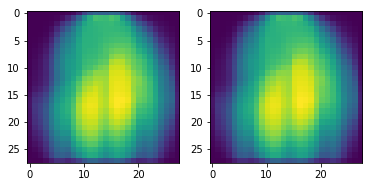

In [9]:
#Lets us have a look at the mean image
mu_test=np.mean(test, axis=0)
pl.subplot(1,2,1)
pl.imshow(mu_test)

mu_train=np.mean(train, axis=0)
pl.subplot(1,2,2)
pl.imshow(mu_train)

In [12]:
#Making the images, vectors as we are doing PCA
test_flatten = test.reshape((-1,28*28)) #-1 is nice, cus i do not need to count
train_flatten = train.reshape((-1,28*28))

print (train_flatten.shape, label_train.shape, test_flatten.shape, label_test.shape)

((60000, 784), (60000,), (10000, 784), (10000,))


In [13]:
#To substract the mean, to get the right variance

def center_data(data):
    mu = np.expand_dims(np.mean(data, axis =0),0) #To align with data
    return data-mu
    
    

In [14]:
train_centered = center_data(train_flatten)

In [15]:
print (train_centered.shape)

(60000, 784)


In [18]:
#As we want to get the covariance matrix that connects images with images, so it has to be 784*784

import time
begin = time.time()

Cov = np.tensordot(train_centered, train_centered, axes =((0),(0)))
print (Cov.shape, time.time()-begin)

((784, 784), 0.3001439571380615)


In [19]:
#Another way of doing it
begin = time.time()

Cov=train_centered.T.dot(train_centered)
print (Cov.shape, time.time()-begin)

((784, 784), 0.2612569332122803)


In [ ]:
#The covariance could be normalized. but as we need the principal axis, we do not need to normalize
pl.imshow(Cov)


previous showed the coviariance showing how a point is correlated to the mean

In [29]:
begin = time.time()

#C = U D Ut

eigenvals, eigenvecs = np.linalg.eigh(Cov)

print(time.time()-begin)

0.101475000381


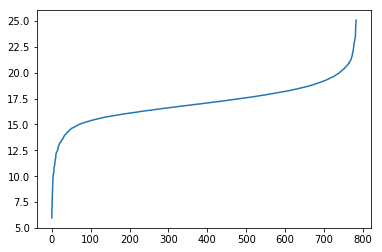

In [24]:
pl.plot(np.log(eigenvals)) #they are organised
#So I could tell that the first eigenvalues have important weight 

##### IF you do this, you can trow a random matrix and you see that the spectrum is flat

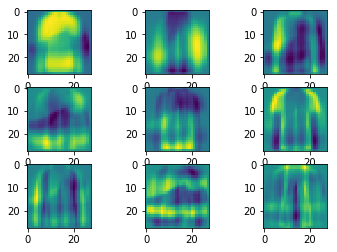

In [27]:
#get the most important eigenvectors

k=9
for i in range(k):
    vector = eigenvecs[:, -i-1]
    pl.subplot(3,3, i+1)
    pl.imshow(vector.reshape((28,28)))

In [30]:
#Same but with more
k= 78
base =eigenvecs[:,-k:]
print (base.shape, train_flatten.shape)

((784, 78), (60000, 784))


In [32]:
PCA_features = train_centered.dot(base)
print(PCA_features.shape)

(60000, 78)


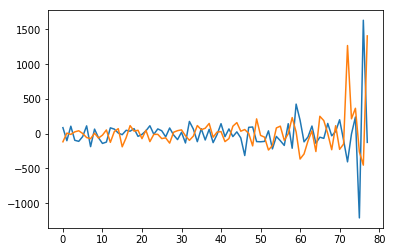

In [33]:
#This is how the first two images are described by the PCA
for i in range(2):
    pl.plot(PCA_features[i])

In [35]:
#PCA is an isometry
# <Ux, Ux> = <x, x>

for _ in range(10):
    i, j =np.random.choice(len(train),2, replace=False)
    dist_spat=np.sum(np.square(train_centered[i]-train_centered[j]))  #Spatial distance
    dist_feat=np.sum(np.square(PCA_features[i]-PCA_features[j])) #Distance in the pca space
    print (dist_spat,dist_feat, dist_spat>=dist_feat)
    


(8863521.0, 8116562.0, True)
(13807552.0, 12708519.0, True)
(5729027.0, 4941303.0, True)
(6391006.0, 5433370.5, True)
(11324174.0, 10298035.0, True)
(3259850.0, 2228858.0, True)
(14039418.0, 13241726.0, True)
(14969473.0, 14073053.0, True)
(9918075.0, 8799030.0, True)
(8156450.0, 7431087.5, True)


In [36]:
print(PCA_features.shape, base.shape)

((60000, 78), (784, 78))


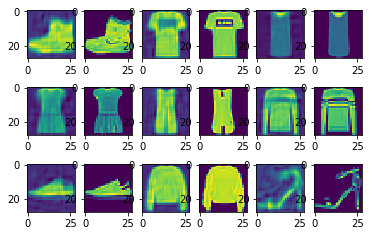

In [38]:
#Reconstruct everything with the PCA features, the left is the reconstructed and the other is the original
reconstruct = PCA_features.dot(base.T)+np.mean(train_flatten, axis=0)
for i in range(9):
    
    pl.subplot(3, 6, 2*i+1)
    rec = reconstruct[i]
    pl.imshow(rec.reshape((28, 28)))
    
    pl.subplot(3, 6, 2*i+2)
    pl.imshow(train[i])

# Single value decomposition
## Klein-gordon equation is the square of the dirac's equation and they spectrum are related

## Sigma is the spectrum only

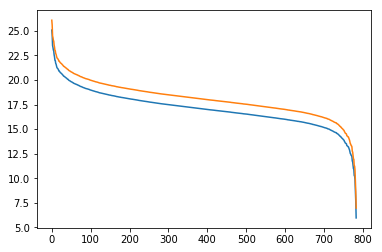

In [42]:
#Single value decomposition
#Klein-gordon equation is the square of the dirac's equation and they spectrum are related

#Sigma is the spectrum only

# Y   = U*Sigma*Vt sigma always diagonal with positive values
# YYt = U*S*Vt*V*St*Ut = U S^2 Ut
# YYt = U*S* I *St*Ut = U S^2 Ut

U, S, V = np.linalg.svd(train_centered.T, full_matrices=False)

pl.plot(np.log(S**2)) #Singular value square should be the eigenvalue decomposition
pl.plot(np.log(eigenvals[::-1])+1) #+1 to differenciate

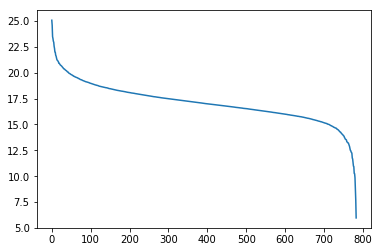

In [43]:
#Singular value decomposition is always ordered
U, S, V = np.linalg.svd(Cov)
pl.plot(np.log(S))